In [98]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf 
import statsmodels.api as sm
import statsmodels as sms

%matplotlib inline

In [86]:
#Import $AMC price data from yfinance and save it as a variable, import data back to July 2020

amc = yf.download('AMC', "2020-07-01", "2021-06-25")
amc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,4.260000,4.600000,4.260000,4.570000,4.570000,4914500
2020-07-02,4.690000,4.690000,4.470000,4.530000,4.530000,3908400
2020-07-06,4.620000,4.640000,4.130000,4.280000,4.280000,5489700
2020-07-07,4.180000,4.290000,4.080000,4.130000,4.130000,2667600
2020-07-08,4.490000,4.520000,4.200000,4.430000,4.430000,5586800
...,...,...,...,...,...,...
2021-06-18,61.259998,64.959999,56.849998,59.259998,59.259998,242896900
2021-06-21,61.340000,63.009998,53.430000,55.689999,55.689999,185876100
2021-06-22,54.099998,58.740002,51.049999,58.270000,58.270000,169494100


<AxesSubplot:xlabel='Date'>

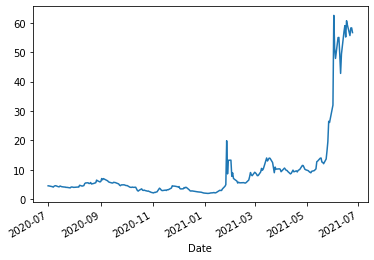

In [87]:
#Plot the adjusted close of AMC

amc['Adj Close'].plot()

In [88]:
#Import TrendReq from pytrends to pull google trends data. If you don't have pytrends downloaded -- pip install pytrends

from pytrends.request import TrendReq
pytrends = TrendReq()

In [89]:
#Import AMC interest overtime from google trends using pytrends

kw_list = ['AMC']

pytrends.build_payload(kw_list, timeframe='today 12-m')
pytrends

In [90]:
#Use the .interest_over_time() function to extract the google trends data as a dataframe. Save to a variable 

amc_gt = pytrends.interest_over_time()
amc_gt

,AMC,isPartial
date,,
2020-06-28,6,False
2020-07-05,6,False
2020-07-12,6,False
2020-07-19,6,False
2020-07-26,6,False
2020-08-02,5,False
2020-08-09,9,False
2020-08-16,11,False
2020-08-23,9,False


Text(0.5, 1.0, 'AMC Adj Close % Google Trends Interest Overtime')

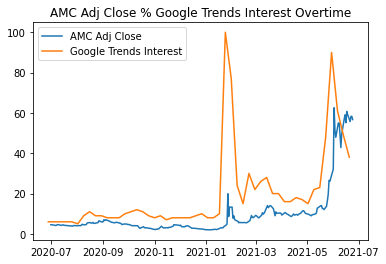

In [91]:
#Plot the AMC adjusted price along with the google trends interest overtime 

plt.plot(amc['Adj Close'], label = 'AMC Adj Close')
plt.plot(amc_gt['AMC'], label = 'Google Trends Interest')
plt.legend(loc='upper left')
plt.title('AMC Adj Close & Google Trends Interest Overtime')

In [92]:
#Import correlation functions from statsmodel.api library 

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

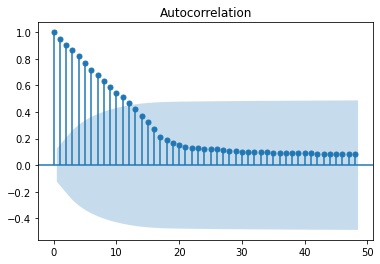

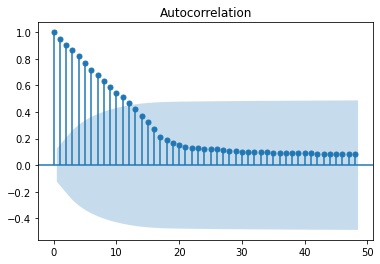

In [93]:
# Plot the auto correlation of AMC Adjusted Close Prices. Autocorrelation, also known as serial correlation,
# refers to the degree of correlation of the same variables between two successive time intervals.

plot_acf(amc['Adj Close'], lags = 48)

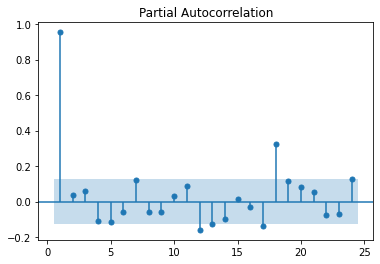

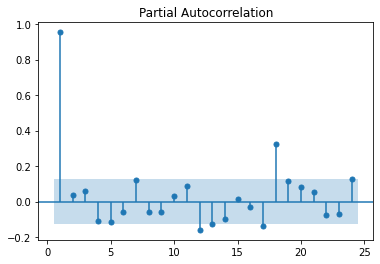

In [104]:
#Plot the partial autocorrelation of AMC Adj Close Prices. 

sms.graphics.tsaplots.plot_pacf(amc['Adj Close'], lags = 24, zero = False)

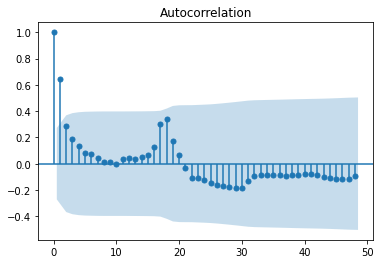

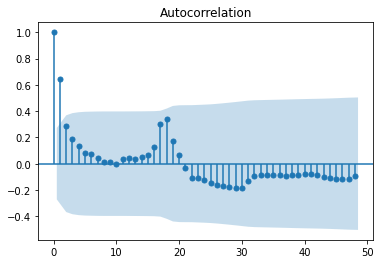

In [105]:
# Plot the auto correlation of AMC Google Trends 

plot_acf(amc_gt['AMC'], lags = 48)

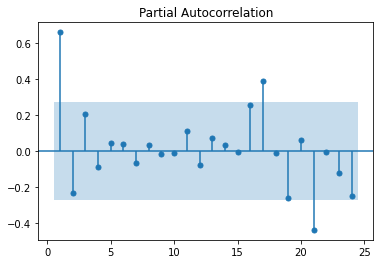

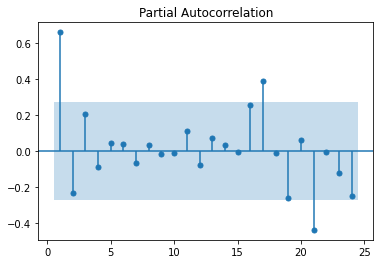

In [106]:
#Plot the partial autocorrelation of google trends interest 

sms.graphics.tsaplots.plot_pacf(amc_gt['AMC'], lags = 24, zero = False)